<a href="https://colab.research.google.com/github/WolfPitToad/Proyecto1_ML/blob/main/Prediccion_Lluvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #1: Modelo para predicción de lluvia**

*Centro Universitario de Ciencias Exactas e Ingenierías*

*División de Tecnologías para la Integración Ciber-Humana*

*Ingeniería Biomédica*

<br>

*Mtra. Sofía Alejandra Aguilar Valdez*

2 de septiembre de 2022

## **Información del equipo**

```NOMBRES:``` 

Andrés Alejandro Sánchez Plascencia

JESUS JULIAN DE NIZ HERNANDEZ

```CÓDIGOS:``` 

216466778

219747417

```LINK REPOSITORIO:```


https://github.com/WolfPitToad/Proyecto1_ML



## **Contenido**



1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias



# **1. Resumen**
(100-300 palabras)

Seattle es conocido por ser una de las ciudades con mayor probabilidad de lluvia, al comenzar el día a día es común que consultemos el clima en nuestro dispositivos para planear el flujo de actividades, vestimenta, medios de transporte y/o accesorios que usaremos en el dia y aunque este tipo de tecnología sea usada practicamente cada dia de nuestra vida, es bueno comenzar con un pequeño ejercicio para adentrarnos al mundo del Deep Learning (DL). El dataset "Did It Rain in Seattle 1948-2017" recopila información del clima diaria reportada en estaciones meteorológicas, nuestro reto es intentar elaborar un modelo de predicción basado en estos datos. 

# **2. Marco teórico**
(300-800 palabras)

# **Problemas Comunes en Deep Learning**


Dados un gran numeros de algoritmos de Deep Learning con distintas caracteristicas y usos, durante el desarrollo de modelos de Deep Learning se requiere determinar el tipo de problematica para planear correctamente una estrategia adecuada. Generalmente, los problemas de DL se dividen en:

Clasificación: El resultado de este tipo de problemas es una variable cualitativa (etiqueta o categoria), por lo que generalmente se obtiene una predicción de la clasificación basado en la probabilidad de pertenencia, donde esta misma se mapea y se define según las observaciones del algoritmo, dentro dew este tipo de problemos podemos encontrar un subtipo llamado Agrupamiento.

Agrupamiento o Clustering: Los problemas de agrupamiento buscan dividir los datos, en subgrupos homogeneos. Por lo que los algoritmos de clustering aprenden a distinguir y clasificar entre estas subdivisiones apartir del conjunto de caracteristicas. 

Regresión: Este tipo de problemas se encuentran dentro del campo del Machine Learning Supervisado, su trabajo es establecer una relacción entre las caracteristicas y el resultado en este tipo de poblemas son variables cuantitativas (numericas). 

Reducción de Variables: Mediante el analisís de los datos y la distribucción de valores en el conjunto de muestras se puede determinar entre distintos parametros, cuales son los que proporcionan mayor cantidad de información y de esta manera eliminar los redundantes

Optimización: Los problemas de optimización (minimos o máximos), buscan un resultado para encontrar el minimo o el maximo global dada una función son bastante abordados por los algoritmos metaheuristicos o bioinspirados, cuya flexibilidad en el proceso de busqueda y explotación les permiten evitar caer en minimos o máximos locales.

El primer paso al momento de diseñar un algoritmo de Deep Learning es analizar los datos de tal manera que podemos determinar su categoria y diseñar la mejor estrategia de solución, es decir decidir la herramienta adecuada para la situacción de esta manera podremos resolver facilmente cualquier problematica presente.



# **3. Objetivos**
Objetivo general y objetivos específicos

Objetivo General:

*  Elaborar un modelo de predicción de lluvia con el dataset propuesto por la docente 

Objetivos Especificos:


*   Procesar la información para su uso correcto y evitar resagos en el aprendizaje
*   Analizar Dataset para Determinar la mejor estrategia al seleccionar el Algoritmo base de Deep Learning

*   Generar un modelo con una eficencia superior del 80%, usando el 75% de los datos como entrenamiento





# **4. Materiales y métodos**

## *Materiales*

Describir este conjunto de datos [[1]](https://www.kaggle.com/code/fatmakursun/rain-forecasting-with-artificial-neural-network/data).

El dataset recopila los reportes del clima de la ciudad de Seattle, (bastante conocida por su lluvia constante), en este se detalla algunos aspectos como: la temperatura min, max,  precipitación, la fecha y si llovió o no. Los datos se encuentran organizados en un archivo .csv (formato de columnas y filas similares al excel). 



## *Métodos*

1. Esquema de metodología
2. Descripción de los métodos y su implementación en código en forma de narrativa.

In [ ]:
#Importar librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Instalamos Kaggle para exportar las bases de datos
!pip install -q kaggle

In [ ]:
!rm -rf ~/.kaggle

In [ ]:
!pwd

/content


Seleccionamos en nuestro perfil de Kraggle en configuración y posteriormente cuentas el generar un Token API, nos descargará un archivo .json que funcionara como llave

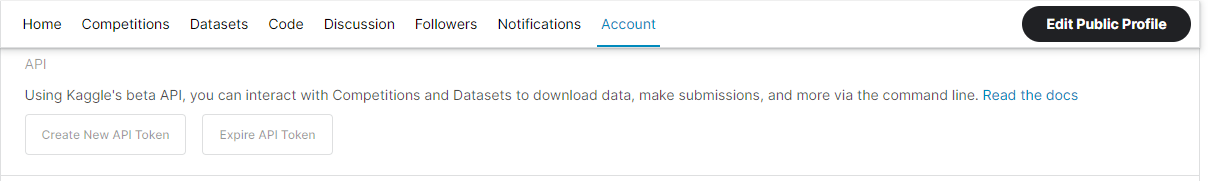

In [ ]:
#Similar a github, Kaggle nos pide una llave para ingresar esta se descarga en un ARCHIVO llamado kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"w0lfpitt0ad","key":"3702f82180f52e118126755edb0118de"}'}

In [ ]:
#Creamos una nueva carpeta 
!mkdir ~/.kaggle 

In [ ]:
#Copiamos la llave y la ocultamos para evitar sea visible
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

En este caso, usaremos el dataset propuesto por la maestra, simplemente señalaremos la opción de copiar comando API y lo pegaremos en una linea de código ejecutable

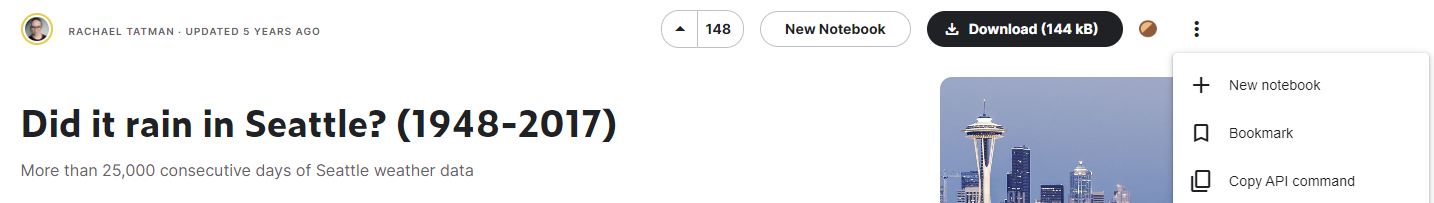

In [ ]:
#Copiamos el codigo AVI del dataset para descargarlo
!kaggle datasets download -d rtatman/did-it-rain-in-seattle-19482017

did-it-rain-in-seattle-19482017.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Descomprimimos el archivo .zip para visualizar la información
!unzip /content/did-it-rain-in-seattle-19482017.zip

Archive:  /content/did-it-rain-in-seattle-19482017.zip
replace seattleWeather_1948-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#Leemos y Guardamos la data, debido al formato de la información se usa la función pd.read_csv
Weather=pd.read_csv('seattleWeather_1948-2017.csv')
#Visualizamos un pedazo de la .head() muestra solamente las primer 5 filas de información
Weather.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
#Observamos información general de los datos para determinar como trabajar
#El analisís de la información es un paso crucial para entender que y como diseñar la red neuronal
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
#Preprocesamiento
Weather.isna().sum()
#Se suman aquellos datos nulos, con la finalidad de eliminarlos del registro

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [ ]:
Weather['RAIN'].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [ ]:
#Transformamos columnas de "Lluvia" a 0 y 1
Weather['RAIN'] = Weather["RAIN"].map(lambda i: 1 if i==True else 0)
Weather['RAIN'].value_counts()

0    14651
1    10900
Name: RAIN, dtype: int64

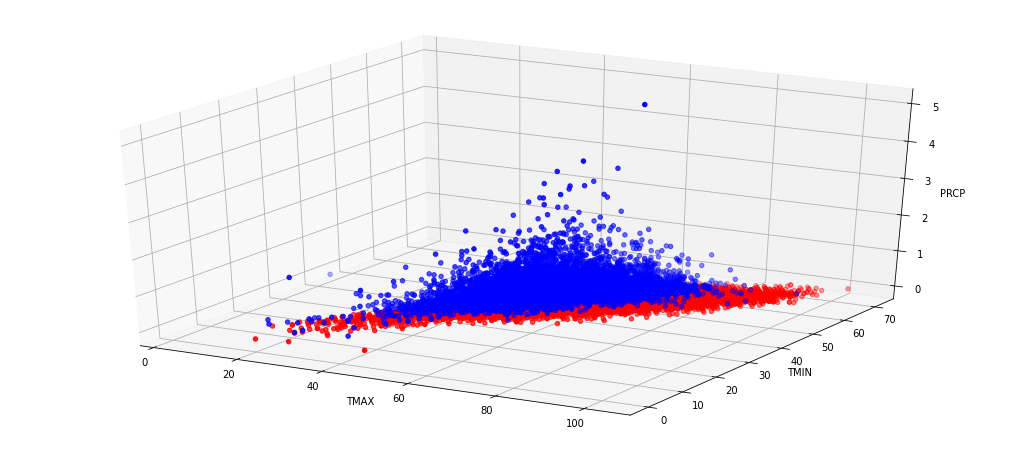

In [ ]:
Weather_plot = Weather[['PRCP','TMAX','TMIN','RAIN']]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TMAX')
ax.set_ylabel('TMIN')
ax.set_zlabel('PRCP')
ax.scatter(Weather_plot[Weather_plot.RAIN == 0]['TMAX'],
           Weather_plot[Weather_plot.RAIN == 0]['TMIN'],
           Weather_plot[Weather_plot.RAIN == 0]['PRCP'],marker="o",color="Red")
ax.scatter(Weather_plot[Weather_plot.RAIN == 1]['TMAX'],
           Weather_plot[Weather_plot.RAIN == 1]['TMIN'],
           Weather_plot[Weather_plot.RAIN == 1]['PRCP'],marker="o",color="Blue")

#Plot 3D de las condiciones de lluvia en azul siendo positivas y en rojo negativas, observamos como aparentemente se distingue una linea

In [ ]:
Weather["DATE"]=pd.to_datetime(Weather["DATE"], format= "%Y-%m-%d")

# Extract day, month and year
Weather["DAY"]=Weather["DATE"].dt.day
Weather["MONTH"]=Weather["DATE"].dt.month
Weather["YEAR"]=Weather["DATE"].dt.year
Weather=Weather.drop(["DATE"], axis=1)
Weather=Weather[["DAY", "MONTH", "YEAR", "TMAX", "TMIN", "PRCP","RAIN"]]
Weather.head()

,DAY,MONTH,YEAR,TMAX,TMIN,PRCP,RAIN
0,1,1,1948,51,42,0.47,1
1,2,1,1948,45,36,0.59,1
2,3,1,1948,45,35,0.42,1
3,4,1,1948,45,34,0.31,1
4,5,1,1948,45,32,0.17,1


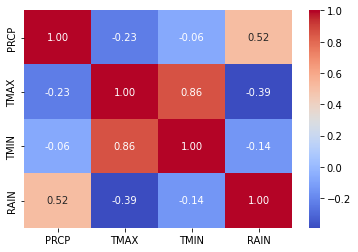

In [ ]:
#Revisando la correlación de las variables
g = sns.heatmap(Weather_plot[["PRCP","TMAX","TMIN","RAIN"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [ ]:
#Importando el modelo a usar
from sklearn.ensemble import RandomForestClassifier

TMAX = 0.07942897582290766
TMIN = 0.031238300356199636
PRCP = 0.8893327238208927


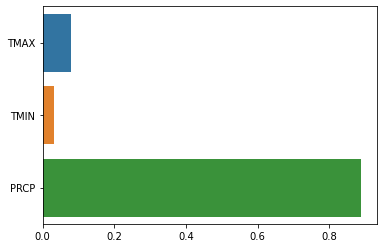

In [ ]:
Weather = Weather.dropna()
rnd_clf2 = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf2.fit(Weather.iloc[:,3:6],Weather.iloc[:,6])
for name, importance in zip(Weather.iloc[:,3:6].columns, rnd_clf2.feature_importances_):
    print(name, "=", importance)

g2 = sns.barplot(y=Weather.iloc[:,3:6].columns,x = rnd_clf2.feature_importances_, orient='h')

DAY = 0.0015191857750471024
MONTH = 0.0078002259479791145
YEAR = 0.002014821946961521
TMAX = 0.07359314348255686
TMIN = 0.02068408830085248
PRCP = 0.8943885345466028


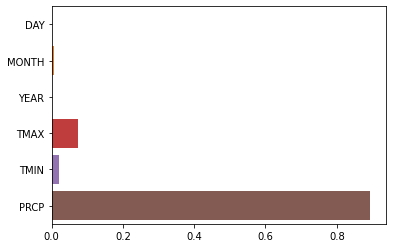

In [ ]:
#Con el algoritmo de Random Forest, estimamos la "importancia de las variables" al momento de predecir la lluvia de estamanera evidenciamos que
#La mejor manera de predecir el clima es considerando la PRCP, en este caso usaremos el Random Forest
#para evaluar la información en un problema de tipo de Reducción de variables

Weather = Weather.dropna()
rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(Weather.iloc[:,0:6],Weather.iloc[:,6])
for name, importance in zip(Weather.iloc[:,0:6].columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=Weather.iloc[:,0:6].columns,x = rnd_clf.feature_importances_, orient='h')

In [ ]:
#Definiendo el modelo
from sklearn.model_selection import train_test_split
RFCM = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'entropy',
            max_features = 'auto',
            random_state = 0
         )

In [ ]:
#Definir Parametros y Etiquetas
#Poniendo la teoría en prueba, se obtienen los valores de PRCP, TMAX y TMIN del clima
X = Weather.iloc[:, [3, 4,5]].values
#Se obtienen las etiquetas asignadas a la lluvia
y = Weather.iloc[:, 6].values

In [ ]:
#Definiendo Variables de Entrenamiento/ Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            test_size = 0.25, 
            random_state = 0)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Entrenando el modelo
RFCM.fit(X_train, y_train)
#Evaluando el modelo
y_pred = RFCM.predict(X_test)



[[3669    0]
 [   0 2718]]


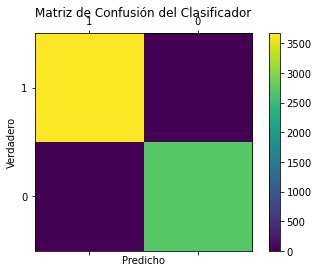

In [ ]:
#Matriz de Confusión
# Haciendo la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = [1, 0]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusión del Clasificador')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

In [ ]:
#Presición
F1=cm[0, 0]/(cm[1, 0]+cm[0, 0])*100
print(F1)


100.0


[[1508 2184]
 [1100 1595]]


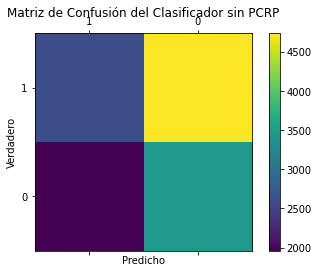

In [ ]:
#Rendimiento del Modelo si se intentará predecir según la fecha
X3 = Weather.iloc[:, [0,1,2]].values

y3 = Weather.iloc[:, 6].values
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25)

from sklearn.preprocessing import StandardScaler
sc3 = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

classifier3 = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy')
classifier3.fit(X3_train, y3_train)

y3_pred = classifier.predict(X3_test)

# Matriz de Confunsión
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_pred)
print(cm3)
labels = [1, 0]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm2)
plt.title('Matriz de Confusión del Clasificador sin PCRP')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

In [ ]:
#Precisión
F2=cm2[0, 0]/(cm2[1, 0]+cm2[0, 0])*100
print(F2)

57.24258289703316


[[1008 2737]
 [1491 1151]]


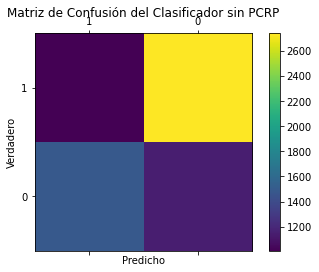

In [ ]:
#Rendimiento del Modelo si se borraran la PRCS y añadimos los dias (underfitting)
X3 = Weather2.iloc[:, [1,2,5]].values

y3 = Weather2.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25)

from sklearn.preprocessing import StandardScaler
sc3 = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

classifier3 = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy')
classifier3.fit(X3_train, y3_train)

y3_pred = classifier.predict(X3_test)

# Matriz de Confunsión
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_pred)
print(cm3)
labels = [1, 0]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm3)
plt.title('Matriz de Confusión del Clasificador sin PCRP')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

In [ ]:
#Precisión
F3=cm3[0, 0]/(cm3[1, 0]+cm3[0, 0])*100
print(F3)

40.33613445378151


# **5. Resultados**
(300-800 palabras, incluir mínimo 2 figuras).

Observamos como en la fig. 1 de resultados el uso del algoritmo de clasificación de Random Forest, fue bastante efectivo al determinar la relacción entre los parametros de Precipitación, Temperarura Min y Max en la predicción de lluvia.


Observamos como en la fig. 1 de resultados el uso del algoritmo de clasificación de Random Forest, fue bastante efectivo al determinar la relacción entre los parametros de Precipitación, Temperarura Min y Max en la predicción de lluvia, donde observamos que al aumentar la cantidad de parametros (lado izquierdo), decae ligeramente el "indice" de componentes ("lado derecho") ya que la repartición estadistica del 100% aumenta.

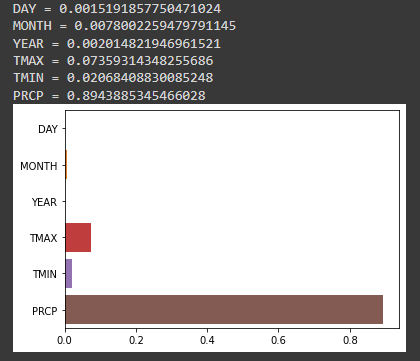 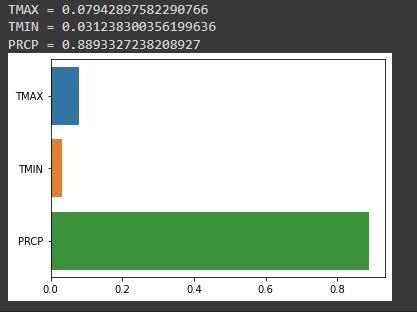

Por lo que se deduce: Que el aprendizaje se encuentra fuertemente influenciado por la cantidad de parametros que se introduccen al modelo y por la calidad de estos mismos (utilidad o relación a lo que se va a aprender).

Observamos como este problema, es más bien un problema de clasificación que de predicción ya que, los datos cuentan con ciertas caracteristicas que permiten "predecir", bajo la premisa de algoritmos de clasificación (KNN) y el resultado esperado era una entre dos categorias (llueve o no) por lo que al hacer una reducción de parametros y la apropiada selección de estos permite entrenar adecuadamente el modelo, comparando:

*   Un modelo de Forest Random Search con los parametros de Precipitación.
*   Un modelo de Forest Random Search con los parametros de Dia, Mes y Año.
*   Un modelo de Forest Random con los parametros de Temperaturas Min-Max y Dias.



El realizar el analisis del dataset nos permitió determinar de mejor manera los parametros a utilizar para entrenar la red, en este caso el parametro de Precipitación mantanía una correlación mayor con la probabilidad de lluvia que la temperatura min y max, e incluso la fecha siendo el deep learning una rama donde debemos distinguir la clase de información a descriminar dada una situación, por este motivo se omitieron metodos basados en el temporal forecasting (muy usado para modelos predictorios basados en un historial)

# **6. Discusión**
Underfitting, overfitting, o no y el porqué
Comparación de su metodología con literatura asociada

A pesar de conseguir el 100% de precisión con los parametros adecuados, nuestro modelo no contiene overfitting (sobre ajustamiento), dado a que la naturaleza propia del algoritmo de Random Forest prevee el sobre ajustamiento de la predicción con los datos, al estar evaluando en consenso y dictaminando una decisión de acuerdo a distintos arboles de decisión. Y tampoco tiene underfitting dado a que los parametros utilizados (Temperatura MIN/MAX y Precipitación), son más que suficientes para establecer un modelo de relacción entre estos mismos. 

Por lo que de haber un sobreajustamiento, habría un bajo error del nivel de entrenamiento y un bajo error del nivel de prueba, mientras que, en un underfitting habría un muy bajo nivel de entrenamiento y un alto error en nivel de prueba, por lo que se podría decir que nuestro algoritmo esta balanceado.

Comparado con trabajos anteriores aplicamos un modelo de analisís de datos similar al trabajo realizado previamente por En,Al [1] sin embargo, el ploteo y comparación fue realizado en 3 Dimensiones para  visualizar mejor la distribución general del dataset. Asi mismo, se tomó la estructura de Random Forest propuesto por Ka,S. [2] donde además realizamos un analisís extra aplicando distintas metodologías (forecasting).

Realizar la comparativa del rendimiento mismo algoritmo con distintos métodos de discriminación de infomación nos ayuda a observar de mejor manera la importancia del manejo estadistico y preprocesamiento de los datos.





# **7. Conclusiones**
(100-300 palabras).

Conocer los algoritmos, su funcionamiento, caracteristicas y sobre todo conocer tu dataset te permite establecer mejores decisiones en la resolución de problemas. La mala elección de parametros o datos mal procesados pueden estropear el aprendizaje de la red, es por esto que es importante preprocesar la información a usar.

El deep learning nos permite programar un ser mucho más capas e inteligente para la resolución de modelos mucho más avanzado y la resolución de problemas muy complejos. Sin embargo, este mismo se desempeñara con calidad en función de los datos y la cantidad de estos mismos que se implementan en el algoritmo por ello es importante aprender a discriminar datos y analizar los dataset previo al entrenamiento de cualquier red de DL

# **8. Referencias**


[1] En, A. (2020). Seattle (Machine and Deep Learning, %100 Accuracy). Kaggle. Recuperado el 9 de Septiembre, 2022, de:
https://www.kaggle.com/code/alperendes/seattle-machine-and-deep-learning-100-accuracy

[2] Ka, S. (2020). 100% Rain Prediction with random forest classifier. Kaggle. Recuperado el 9 de Septiewmbre, 2022, de:
https://www.kaggle.com/code/katiyarsachin3/100-rain-prediction-with-random-forest-classifier

[3] Pb, V. (2020, February 18). Perceptron. Kaggle. Recuperado el 8 de Septiembre, 2022, de: https://www.kaggle.com/code/prashfio/perceptron/notebook




